                                 THE SPARK FOUNDATION             GRIP DECEMBER  
                                        TASK 1
                PREDICTING THE PERCENTAGE OF STUDENT ON THE BASIS OF STUDY HOURS.

                                                            BY KARAN CHOUDHARY   date-  30/12/2020 

In [98]:
#importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#linear regression model
from sklearn.linear_model import LinearRegression  
#going for metrices for analysis of the model we are building
from sklearn import metrics  
%matplotlib inline

In [12]:
#now we will read the datset
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
print(data.columns)

Index(['Hours', 'Scores'], dtype='object')


In [24]:
print('rows and columns of the data',data.shape)

rows and columns of the data (25, 2)


In [25]:
#counting the number of  null characters in the datset and the memory taken by them
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
#it defines the count,means,min , max and quartile of each columns
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


                                         DATA CORRELAION 

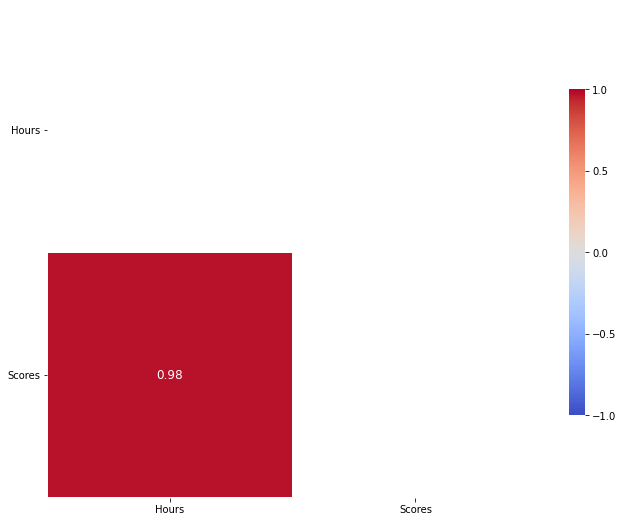

In [179]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(11, 15))
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [33]:
#checking null value in the dataset upon total length taken
print((data.isnull().sum() / len(data))*100)

Hours     0.0
Scores    0.0
dtype: float64


        PLOTIING THE X AND Y FOR BETTER ANALLYSIS RELATIONSHIP BETWEEN HOURS AND THE SCORES

HERE WE CAN SEE THE POSITIVE LINAER REGRESSION BETWEEN THE HOURS AND THE SCORES FOR STUDENT


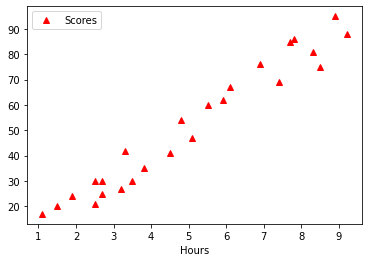

In [64]:
#analysisng the plot of the score vs hours
print("HERE WE CAN SEE THE POSITIVE LINAER REGRESSION BETWEEN THE HOURS AND THE SCORES FOR STUDENT")
data.plot(x='Hours', y='Scores', style='^',color='red')


In [66]:
#now we will be preparing the data for  the model  
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs)..

In [88]:
X = data.iloc[:, :-1].values
print('X dependent data (hours in decimal)',X)
Y = data.iloc[:, 1].values  
print('Y score in Integer',Y)

X dependent data (hours in decimal) [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y score in Integer [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [82]:
print("size of independent coloumn    X-->",X.shape,'\nsize of dependent coloumn      Y-->',Y.shape)

size of independent coloumn    X--> (25, 1) 
size of dependent coloumn      Y--> (25,)


In [83]:
# now we will spliting the data for traing and test part.we are not using for validation data becacuse dataset is too small

In [204]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.5, random_state=21) 

In [205]:
print('X training data',X_train.shape,'X test data',X_test.shape)
print('Y training data',Y_train.shape,'X test data',Y_test.shape)

X training data (12, 1) X test data (13, 1)
Y training data (12,) X test data (13,)


                                TRAINING ALGORITHM
    We have split our data into training and testing sets, and now is finally the time to train our   algorithm. 

In [206]:
#before training model  lets know some basics of linear regresssion

In [207]:
regressor = LinearRegression()  
print('Training Start of model')
regressor.fit(X_train, Y_train) 
print(regressor)
print("Training complete.")

Training Start of model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Training complete.


In [208]:
print('Coffeint of regressor',regressor.coef_)

Coffeint of regressor [9.71935853]


In [209]:
print('model interept',regressor.intercept_)

model interept 2.013745704467375


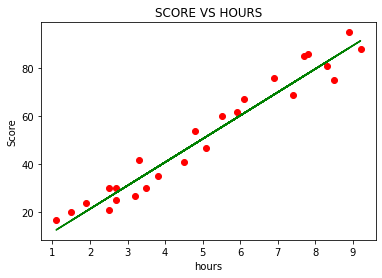

In [210]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='red')
plt.plot(X, line,color='green');
plt.ylabel('Score')
plt.xlabel('hours')
plt.title('SCORE VS HOURS')
plt.show()

In [211]:
#making the predicition

In [212]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[5.1]
 [6.1]
 [3.3]
 [1.5]
 [5.5]
 [7.4]
 [6.9]
 [5.9]
 [3.8]
 [2.5]
 [2.7]
 [9.2]
 [7.8]]


In [213]:
# Comparing Actual vs Predicted
dataset = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
dataset 

,Actual,Predicted
0,47,51.582474
1,67,61.301833
2,42,34.087629
3,20,16.592784
4,60,55.470218
5,69,73.936999
6,76,69.077320
7,62,59.357961
8,35,38.947308
9,21,26.312142


In [214]:
# You can also test with your own data
single_user = 9.25
student_prediction = y_pred
print("No of Hours = {}".format(single_user))
print("Predicted Score = {}".format(student_prediction[0]))

No of Hours = 9.25
Predicted Score = 51.582474226804116


In [215]:
from sklearn import metrics  
from sklearn.metrics import accuracy_score

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 

print('R2 score:', metrics.r2_score(Y_test, y_pred)*100)


Mean Absolute Error: 4.864789849325929
R2 score: 94.59761498684507


THANKS!!!